In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import requests 
from imp import reload 
import Util; reload(Util)
import Cdf
import Pmf
import warnings
from matplotlib.ticker import FuncFormatter
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
google_data = pd.read_csv('../dataset/google-jun.csv', sep = ',', encoding = "ISO-8859-1")
fb_data = pd.read_csv('../dataset/facebook-jun.csv', sep = ',', encoding = "ISO-8859-1")
ut_data = pd.read_csv('../dataset/youtube-jun.csv', sep = ',', encoding = "ISO-8859-1")
google_asn = [15169, 43515, 36040]

In [13]:
google_data.head()

,asn,destination,holder,isp_cache,service,skunitid,timestamp,ttl
0,4773,103.1.139.144,MOBILEONELTD-AS-AP MobileOne Ltd. Mobile/Inter...,1,www.google.com,663066,2015-06-15,6
1,4773,103.1.139.144,MOBILEONELTD-AS-AP MobileOne Ltd. Mobile/Inter...,1,www.google.com,663066,2015-06-16,6
2,4773,103.1.139.144,MOBILEONELTD-AS-AP MobileOne Ltd. Mobile/Inter...,1,www.google.com,663066,2015-06-17,6
3,4773,103.1.139.144,MOBILEONELTD-AS-AP MobileOne Ltd. Mobile/Inter...,1,www.google.com,663066,2015-06-23,6
4,4773,103.1.139.144,MOBILEONELTD-AS-AP MobileOne Ltd. Mobile/Inter...,1,www.google.com,663066,2015-06-24,6


In [3]:
len(ut_data.index)

121094

In [4]:
len(set(google_data['holder']))
# for a in sorted(set(google_data['holder'])):
#     print("{} = {} ".format(set(google_data[google_data['holder'] == a]['asn']), a))


74

In [5]:
len(set(ut_data[ut_data['isp_cache'] ==0]['holder']))
# for a in set(ut_data['holder']):
#     print("{} = {} ".format(set(ut_data[ut_data['holder'] == a]['asn']), a))


28

In [6]:
print("Number of probes that have Google Cache: {} = {}" .format(
    len(set(google_data[google_data['isp_cache'] == 1]['skunitid'])), 
    round(len(set(google_data[google_data['isp_cache'] == 1]['skunitid']))/len(set(google_data['skunitid'])) , 2)))
print("Number of probes that have not Google Cache: {} = {}".format(
    len(set(google_data[google_data['isp_cache'] == 0]['skunitid'])),
    round(len(set(google_data[google_data['isp_cache'] == 0]['skunitid']))/len(set(google_data['skunitid'])), 2)))
print("Number of probes : %d"%len(set(google_data['skunitid'])))

print("Number of probes that have YouTube Cache: {} = {}" .format(
    len(set(ut_data[ut_data['isp_cache'] == 1]['skunitid'])), 
    round(len(set(ut_data[ut_data['isp_cache'] == 1]['skunitid']))/len(set(ut_data['skunitid'])) , 2)))
print("Number of probes that have not YouTube Cache: {} = {}".format(
    len(set(ut_data[ut_data['isp_cache'] == 0]['skunitid'])),
    round(len(set(ut_data[ut_data['isp_cache'] == 0]['skunitid']))/len(set(ut_data['skunitid'])), 2)))
print("Number of probes : %d"%len(set(ut_data['skunitid'])))

Number of probes that have Google Cache: 33 = 0.35
Number of probes that have not Google Cache: 95 = 1.0
Number of probes : 95
Number of probes that have YouTube Cache: 32 = 0.34
Number of probes that have not YouTube Cache: 95 = 1.0
Number of probes : 95


# CDF of TTL for Google, Facebook and YouTube

In [7]:
ut_no_cache = ut_data[ut_data['isp_cache'] == 0]
ggl_no_cache = google_data[google_data['isp_cache'] == 0]
ut_cache = ut_data[ut_data['isp_cache'] == 1]
ggl_cache = google_data[google_data['isp_cache'] == 1]

fb_ttl = np.rint(fb_data['ttl'])

ggl_isp_cache_ttl = np.rint(ggl_cache['ttl'])
ggl_cdn_ttl = np.rint(ggl_no_cache[ggl_no_cache['asn'].isin(google_asn)]['ttl'])
ggl_other_as_ttl = np.rint(ggl_no_cache[~ggl_no_cache['asn'].isin(google_asn)]['ttl'])

ut_isp_cache_ttl = np.rint(ut_cache['ttl'])
ut_cdn_ttl = np.rint(ut_no_cache[ut_no_cache['asn'].isin(google_asn)]['ttl'])
ut_other_as_ttl = np.rint(ut_no_cache[~ut_no_cache['asn'].isin(google_asn)]['ttl'])

In [8]:
print("Google ISP:  {} = {}".format(len(ggl_cache.index), round(len(ggl_cache)/len(google_data.index) ,2)))
print("Google CDN:  {} = {}".format(len(ggl_no_cache[ggl_no_cache['asn'].isin(google_asn)].index), 
                                  round(len(ggl_no_cache[ggl_no_cache['asn'].isin(google_asn)].index)
                                        /len(google_data.index) ,2)))
print("Google Other AS:  {} = {}".format(len(ggl_no_cache[~ggl_no_cache['asn'].isin(google_asn)].index), 
                                  round(len(ggl_no_cache[~ggl_no_cache['asn'].isin(google_asn)].index)
                                        /len(google_data.index) ,2)))

print("\nYouTube ISP:  {} = {}".format(len(ut_cache.index), round(len(ut_cache)/len(ut_data.index) ,2)))
print("YouTube CDN:  {} = {}".format(len(ut_no_cache[ut_no_cache['asn'].isin(google_asn)].index), 
                                  round(len(ut_no_cache[ut_no_cache['asn'].isin(google_asn)].index)
                                        /len(ut_data.index) ,2)))
print("YouTube Other AS:  {} = {}".format(len(ut_no_cache[~ut_no_cache['asn'].isin(google_asn)].index), 
                                  round(len(ut_no_cache[~ut_no_cache['asn'].isin(google_asn)].index)
                                        /len(ut_data.index) ,2)))

Google ISP:  29170 = 0.25
Google CDN:  67753 = 0.59
Google Other AS:  18760 = 0.16

YouTube ISP:  28643 = 0.24
YouTube CDN:  80223 = 0.66
YouTube Other AS:  12228 = 0.1


In [9]:
cfttl = Cdf.MakeCdfFromList(fb_ttl)

cg_cdn_ttl = Cdf.MakeCdfFromList(ggl_cdn_ttl)
cg_isp_ttl = Cdf.MakeCdfFromList(ggl_isp_cache_ttl)
cg_o_as_ttl = Cdf.MakeCdfFromList(ggl_other_as_ttl)

cu_cdn_ttl = Cdf.MakeCdfFromList(ut_cdn_ttl)
cu_isp_ttl = Cdf.MakeCdfFromList(ut_isp_cache_ttl)
cu_o_as_ttl = Cdf.MakeCdfFromList(ut_other_as_ttl)

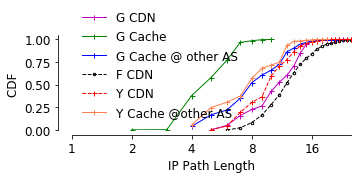

In [10]:
fig = plt.figure(figsize=(5, 1.75))
plt.rcParams['font.size'] = 12

yticks = np.arange(0,1.1,0.25)

plt.plot(cg_cdn_ttl.xs, cg_cdn_ttl.ps, marker='+', linewidth=1, markersize=5, 
         fillstyle='none', color = 'm', rasterized=True)
plt.plot(cg_isp_ttl.xs, cg_isp_ttl.ps, marker='+', linewidth=1, markersize=5, 
         fillstyle='none', color = 'g', rasterized=True)
plt.plot(cg_o_as_ttl.xs, cg_o_as_ttl.ps, marker='+', linewidth=1, markersize=5, 
         fillstyle='none', color = 'b', rasterized=True)

plt.plot(cfttl.xs, cfttl.ps, marker='.', linewidth=1, linestyle='--', markersize=5, 
         fillstyle='none', color = 'k', rasterized=True)


plt.plot(cu_cdn_ttl.xs, cu_cdn_ttl.ps, marker='+', linestyle = '--', linewidth=1, markersize=5, 
         fillstyle='none', color = 'r', rasterized=True)
# plt.plot(cu_isp_ttl.xs, cu_isp_ttl.ps, marker='*', linewidth=1, markersize=5, 
#          fillstyle='none', color = 'green', rasterized=True)
plt.plot(cu_o_as_ttl.xs, cu_o_as_ttl.ps, marker='+', linewidth=1, markersize=5, 
         fillstyle='none', color = 'coral', rasterized=True)

ylab = "CDF " #[%.2f M]" %(len(cf4ttl.xs) / 1000000)

ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_xlim([1,25])
ax.set_ylim([0,1.05])
ax.set_xscale('log', basex=2)
ax.set_xlabel('IP Path Length', fontsize=12)
ax.set_ylabel(ylab, fontsize=12)
formatter = FuncFormatter(lambda y, _: '{:.16g}'.format(y))
ax.xaxis.set_major_formatter(formatter)

leg = ax.legend(["G CDN","G Cache", "G Cache @ other AS", "F CDN", 
                 "Y CDN", "Y Cache @other AS"],
           fontsize=12, markerscale=1., loc='top center', 
                   frameon=False)
for legobj in leg.legendHandles:
    legobj.set_linewidth(1)
leg.get_frame().set_facecolor('none')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
# ax3.set_ylabel('[\'15 - \'17]')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.savefig('../gfx/tracerout_ggl_fb_ut_ttl.pdf', format='pdf', bbox_inches='tight')